In [1]:
from ego_solver import EGO
import numpy as np
# from matplotlib import colors, ticker, cm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle
import time
%matplotlib inline

sns.set_style('whitegrid')

E:\ProgramFiles_w\Engineering\Anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


(30L, 1L, 2L)
(836L, 2L)


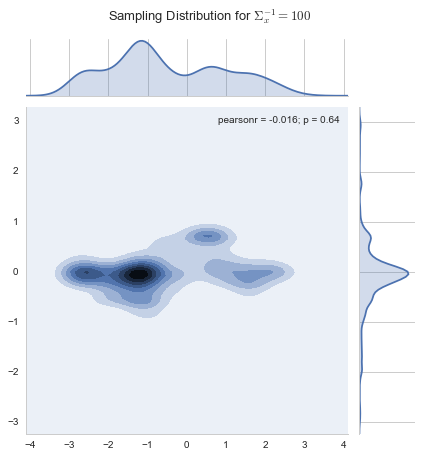

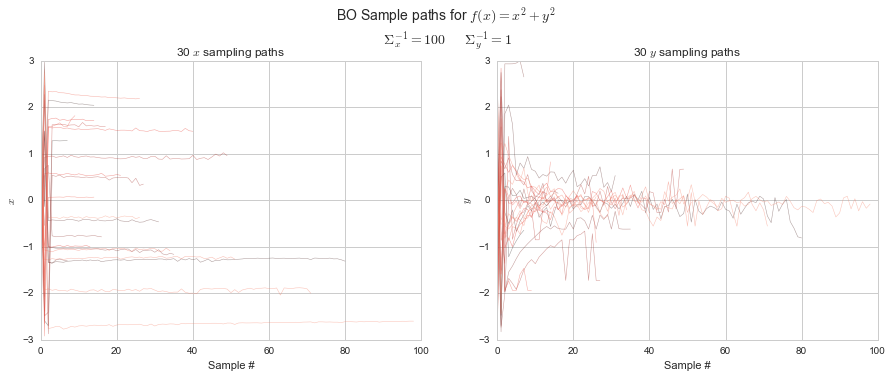

In [85]:
file_address = 'solution_obj_name_parabolic_maxiter_100_repeat_30x100.0.pkl'
with open(file_address, 'r') as f:
    dat = pickle.load(f)

solution = np.array(dat['solution'])
print solution.shape
X =np.copy(solution[0,0,0])
for i in range(1,30):
    X = np.vstack((X,solution[i,0,0]))
print X.shape

sns.jointplot(X[:,0],X[:,1], kind='kde')
plt.suptitle(r'Sampling Distribution for $\Sigma^{-1}_x=100$', y=1.05, fontsize=13)

# plt.plot(solution[0,0,0])
def hairplot(solution,sig):
    
    with sns.color_palette('Reds_d', n_colors=30):
        fig,ax=plt.subplots(ncols=2, figsize=(15,5))
        for i in range(1,30):
            ax[0].plot(solution[i,0,0][:,0], lw=0.5, alpha=.5)
            ax[1].plot(solution[i,0,0][:,1], lw=0.5, alpha=.5)
        ax[0].set_title('30 $x$ sampling paths')
        ax[1].set_title('30 $y$ sampling paths')
        fig.suptitle('BO Sample paths for $f(x)=x^2+y^2$\n $\Sigma^{-1}_x='+str(sig)+'$'+\
                     '\t $\Sigma^{-1}_y=1$',
                     fontsize=14, y=1.05)
        ax[0].set_ylabel('$x$')
        ax[0].set_xlabel('Sample #')
        ax[1].set_ylabel('$y$')
        ax[1].set_xlabel('Sample #')
hairplot(solution,100)

(30L, 1L, 2L)


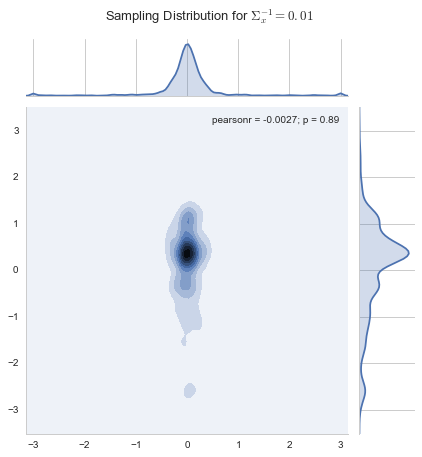

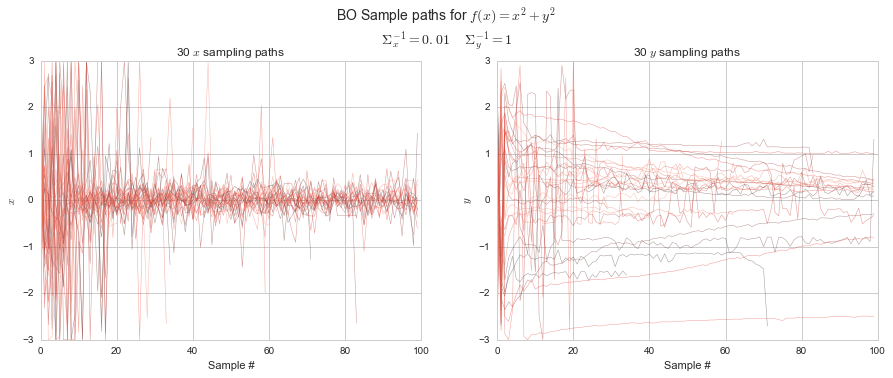

In [97]:
file_address = 'solution_obj_name_parabolic_maxiter_100_repeat_30x0.01.pkl'
with open(file_address, 'r') as f:
    dat = pickle.load(f)
    
solution = np.array(dat['solution'])
print solution.shape
X =np.copy(solution[0,0,0])
for i in range(1,30):
    X = np.vstack((X,solution[i,0,0]))
X.shape

sns.jointplot(X[:,0],X[:,1], kind='kde')
plt.suptitle(r'Sampling Distribution for $\Sigma^{-1}_x=0.01$', y=1.05, fontsize=13)

hairplot(solution, 0.01)

(30L, 1L, 2L)


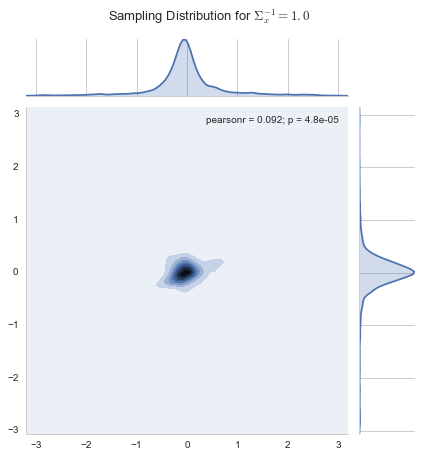

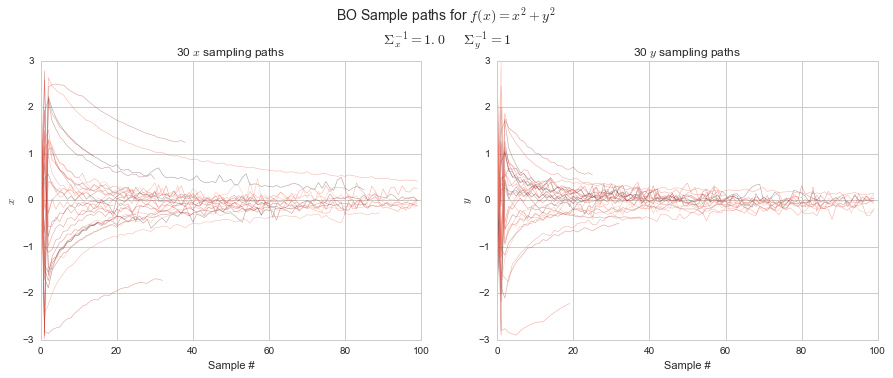

In [75]:
file_address = 'solution_obj_name_parabolic_maxiter_100_repeat_30x1.0.pkl'
with open(file_address, 'r') as f:
    dat = pickle.load(f)
    
solution = np.array(dat['solution'])
print solution.shape
X =np.copy(solution[0,0,0])
for i in range(1,30):
    X = np.vstack((X,solution[i,0,0]))
X.shape

sns.jointplot(X[:,0],X[:,1], kind='kde')
plt.suptitle(r'Sampling Distribution for $\Sigma^{-1}_x=1.0$', y=1.05, fontsize=13)
hairplot(solution, 1.0)

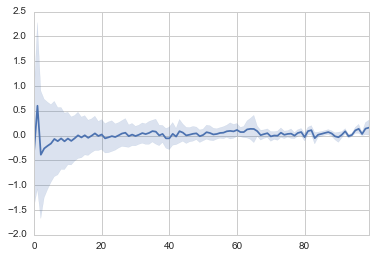

In [10]:
sns.tsplot(solution[0,0,0])

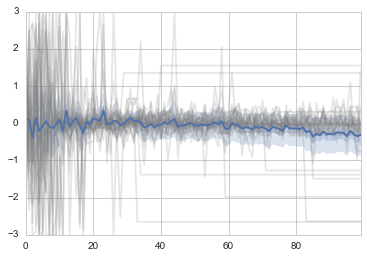

In [102]:
times = np.zeros((30,100))
for i in range(30):
    path = solution[i,0,0][:,0]
    times[i, :path.size] = path
    times[i, path.size:] = np.ones(100-path.size)*path[-1]
sns.tsplot(times, err_style='unit_traces', color='gray')
sns.tsplot(times, ci=[68,99.7])


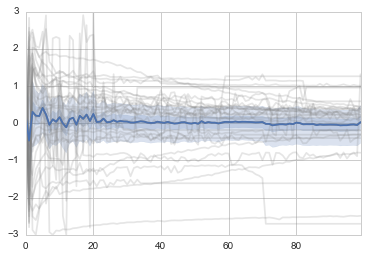

In [99]:


times = np.zeros((30,100))
for i in range(30):
    path = solution[i,0,0][:,1]
    times[i, :path.size] = path
    times[i, path.size:] = np.ones(100-path.size)*path[-1]
sns.tsplot(times, err_style='unit_traces', color='gray')
sns.tsplot(times, ci=[68,99.7])


In [14]:
[solution[i,0,0] for i in range(30)]

[array([[ -1.43951852e+00,   8.07049644e-01],
        [  2.27906166e+00,  -1.07440660e+00],
        [ -1.67103634e+00,   8.99701214e-01],
        [ -1.24944478e+00,   7.31765997e-01],
        [ -1.08606099e+00,   6.72934306e-01],
        [ -9.42406847e-01,   6.23301044e-01],
        [ -8.25800794e-01,   6.89746976e-01],
        [ -7.90494681e-01,   5.65383324e-01],
        [ -6.80582717e-01,   5.66143144e-01],
        [ -6.83342373e-01,   4.52799520e-01],
        [ -5.88128734e-01,   4.69678225e-01],
        [ -5.90406517e-01,   3.76261442e-01],
        [ -5.13996890e-01,   4.04944125e-01],
        [ -4.60700231e-01,   4.70797203e-01],
        [ -4.46586048e-01,   3.72933077e-01],
        [ -3.88365476e-01,   4.01603016e-01],
        [ -3.99304108e-01,   3.09881958e-01],
        [ -3.43041630e-01,   3.36950288e-01],
        [ -3.00597110e-01,   3.90212879e-01],
        [ -3.00509446e-01,   2.84590102e-01],
        [ -2.77569222e-01,   3.22050798e-01],
        [ -3.50093959e-01,   2.388